# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?&units=metric&'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #= response["results"][0]["lat"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | tarko-sale
Processing Record 8 of Set 1 | mitsamiouli
Processing Record 9 of Set 1 | porbandar
Processing Record 10 of Set 1 | vuktyl
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | libreville
Processing Record 14 of Set 1 | matara
Processing Record 15 of Set 1 | lchashen
Processing Record 16 of Set 1 | porto walter
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | amparafaravola
Processing Record 22 of Set 1 | pernik
P

City not found. Skipping...
Processing Record 37 of Set 4 | yeppoon
Processing Record 38 of Set 4 | balikpapan
Processing Record 39 of Set 4 | grand-lahou
Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | chara
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | kurilsk
Processing Record 44 of Set 4 | san ramon
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | cabedelo
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | nsanje
Processing Record 49 of Set 4 | aykhal
Processing Record 0 of Set 5 | saint-michel-des-saints
Processing Record 1 of Set 5 | loa janan
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | hobyo
Processing Record 5 of Set 5 | south yuba city
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | lively
Processing Record 8 of Set 5 | samarai
Processing Record 9 

Processing Record 27 of Set 8 | westport
Processing Record 28 of Set 8 | zafra
Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | jakar
Processing Record 31 of Set 8 | kuching
Processing Record 32 of Set 8 | opunake
Processing Record 33 of Set 8 | abu dhabi
Processing Record 34 of Set 8 | soeng sang
Processing Record 35 of Set 8 | taoudenni
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | paragominas
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | lhokseumawe
Processing Record 41 of Set 8 | muisne
Processing Record 42 of Set 8 | kahului
Processing Record 43 of Set 8 | zlobin
Processing Record 44 of Set 8 | jatai
Processing Record 45 of Set 8 | inhambane
Processing Record 46 of Set 8 | salta
Processing Record 47 of Set 8 | luleburgaz
Processing Record 48 of Set 8 | wanning
Processing Record 49 of Set 8 | milas
Processing Record 0 of Set 9 | baragaon
Processing Record 1

Processing Record 17 of Set 12 | najran
Processing Record 18 of Set 12 | dibulla
Processing Record 19 of Set 12 | copiapo
Processing Record 20 of Set 12 | amarillo
Processing Record 21 of Set 12 | khonuu
City not found. Skipping...
Processing Record 22 of Set 12 | wahran
City not found. Skipping...
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | namibe
Processing Record 25 of Set 12 | gladstone
Processing Record 26 of Set 12 | pasco
Processing Record 27 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 28 of Set 12 | paamiut
Processing Record 29 of Set 12 | kirakira
Processing Record 30 of Set 12 | vardo
Processing Record 31 of Set 12 | ugoofaaru
Processing Record 32 of Set 12 | manono
Processing Record 33 of Set 12 | tecoanapa
Processing Record 34 of Set 12 | mbanza-ngungu
Processing Record 35 of Set 12 | crystal lake
Processing Record 36 of Set 12 | tra vinh
Processing Record 37 of Set 12 | cayenne
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,25.23,37,57,1.30,TL,1670380639
1,hamilton,39.1834,-84.5333,12.77,97,100,8.05,US,1670380185
2,ushuaia,-54.8000,-68.3000,4.81,48,75,5.14,AR,1670380640
3,bethel,41.3712,-73.4140,12.47,87,100,0.45,US,1670380641
4,dikson,73.5069,80.5464,-15.64,94,100,5.68,RU,1670380641


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,25.23,37,57,1.30,TL,1670380639
1,hamilton,39.1834,-84.5333,12.77,97,100,8.05,US,1670380185
2,ushuaia,-54.8000,-68.3000,4.81,48,75,5.14,AR,1670380640
3,bethel,41.3712,-73.4140,12.47,87,100,0.45,US,1670380641
4,dikson,73.5069,80.5464,-15.64,94,100,5.68,RU,1670380641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

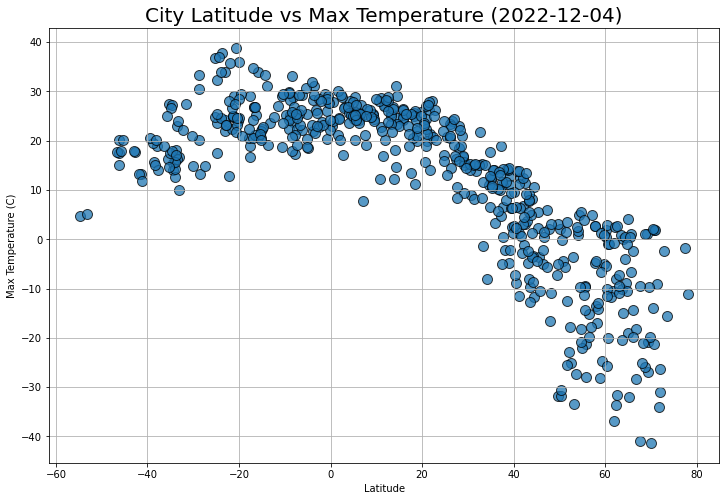

In [8]:
# Build scatter plot for latitude vs. temperature
scat1_x_axis = city_data_df['Lat'].values.tolist()
scat2_y_axis = city_data_df['Max Temp'].values.tolist()
plt.rcParams['figure.figsize'] = [12, 8]

# Plot it
plt.scatter(scat1_x_axis,scat2_y_axis, edgecolors = 'black', s=100, alpha = .75)
plt.title("City Latitude vs Max Temperature (2022-12-06)", fontsize =20)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

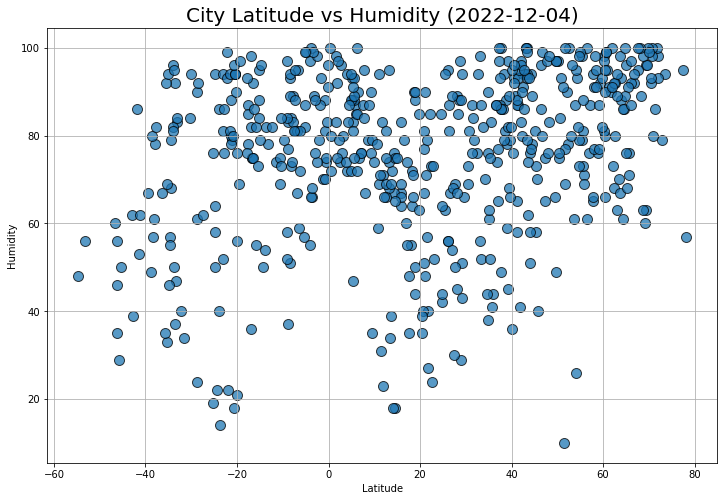

In [9]:
# Build scatter plot for latitude vs. temperature
scat1_x_axis = city_data_df['Lat'].values.tolist()
scat2_y_axis = city_data_df['Humidity'].values.tolist()
plt.rcParams['figure.figsize'] = [12, 8]

# Plot it
plt.scatter(scat1_x_axis,scat2_y_axis, edgecolors = 'black', s=100, alpha = .75)
plt.title("City Latitude vs Humidity (2022-12-06)", fontsize =20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

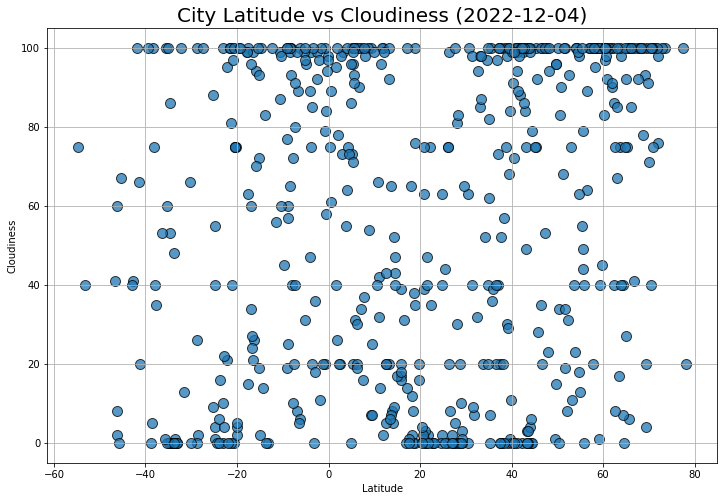

In [10]:
# Build scatter plot for latitude vs. temperature
scat1_x_axis = city_data_df['Lat'].values.tolist()
scat2_y_axis = city_data_df['Cloudiness'].values.tolist()
plt.rcParams['figure.figsize'] = [12, 8]

# Plot it
plt.scatter(scat1_x_axis,scat2_y_axis, edgecolors = 'black', s=100, alpha = .75)
plt.title("City Latitude vs Cloudiness (2022-12-06)", fontsize =20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

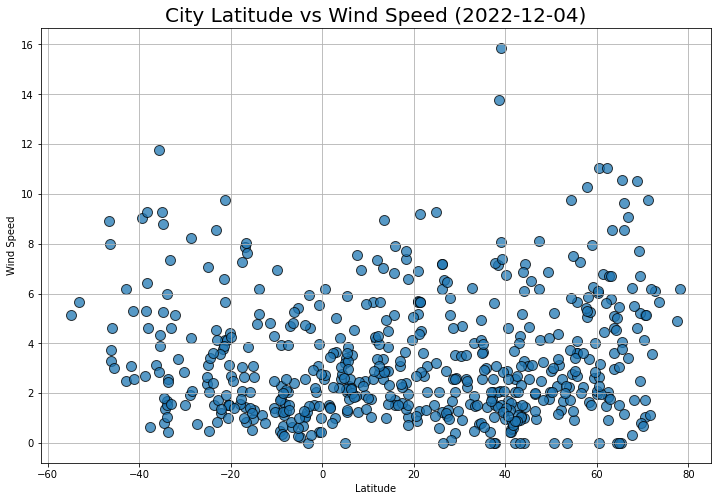

In [11]:
# Build scatter plot for latitude vs. temperature
scat1_x_axis = city_data_df['Lat'].values.tolist()
scat2_y_axis = city_data_df['Wind Speed'].values.tolist()
plt.rcParams['figure.figsize'] = [12, 8]

# Plot it
plt.scatter(scat1_x_axis,scat2_y_axis, edgecolors = 'black', s=100, alpha = .75)
plt.title("City Latitude vs Wind Speed (2022-12-06)", fontsize =20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#y=mx + b

#x values are latitude
#x_values = soemthing
#y_values = something

def linear_regression(x_value, y_value):
    #y_values vary by chart
    x_values = x_value.values.tolist()
    x_values = pd.Series(x_values)
    
    #y_values vary by chart
    y_values = y_value.values.tolist()
    y_values = pd.Series(y_values)

    #linregress returns an object with float values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #r-value
    regress_values = x_values * slope + intercept

    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}')
    return line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,12.77,97,100,8.05,US,1670380185
3,bethel,41.3712,-73.4140,12.47,87,100,0.45,US,1670380641
4,dikson,73.5069,80.5464,-15.64,94,100,5.68,RU,1670380641
5,tarko-sale,64.9225,77.7850,-19.04,96,27,5.47,RU,1670380642
7,porbandar,21.6422,69.6093,21.40,40,2,4.51,IN,1670380643


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,25.23,37,57,1.30,TL,1670380639
2,ushuaia,-54.8000,-68.3000,4.81,48,75,5.14,AR,1670380640
6,mitsamiouli,-11.3847,43.2844,27.04,74,56,4.82,KM,1670380643
9,puerto ayora,-0.7393,-90.3518,20.31,88,20,0.45,EC,1670380645
14,porto walter,-8.2686,-72.7439,23.80,84,100,1.11,BR,1670380647


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8534925416127299


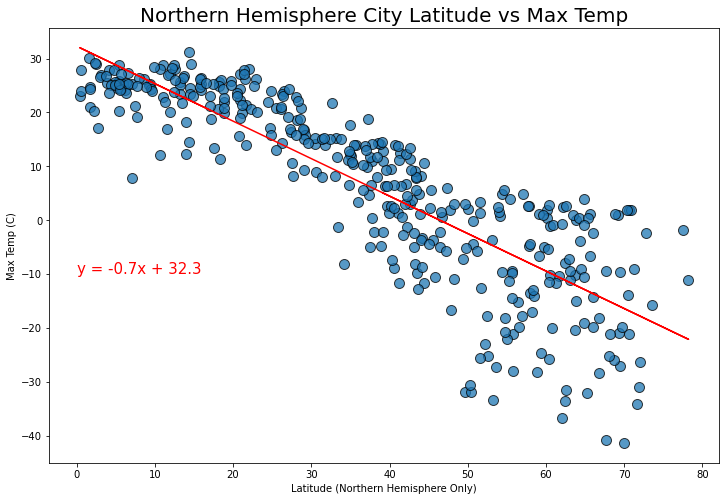

In [35]:
#Northern Hemisphere City Lat vs Max Temp
line_equation = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

northern_x_values = northern_hemi_df['Lat']
northern_y_values = northern_hemi_df['Max Temp']

#Make scatter plot
plt.scatter(northern_x_values,northern_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Northern Hemisphere Only)')
plt.ylabel('Max Temp (C)')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Northern Hemisphere City Latitude vs Max Temp", fontsize =20)

#add regression
plt.annotate(line_equation,(0,-10),fontsize=15,color="red")

plt.show()


The r-value is: 0.4826507328163205


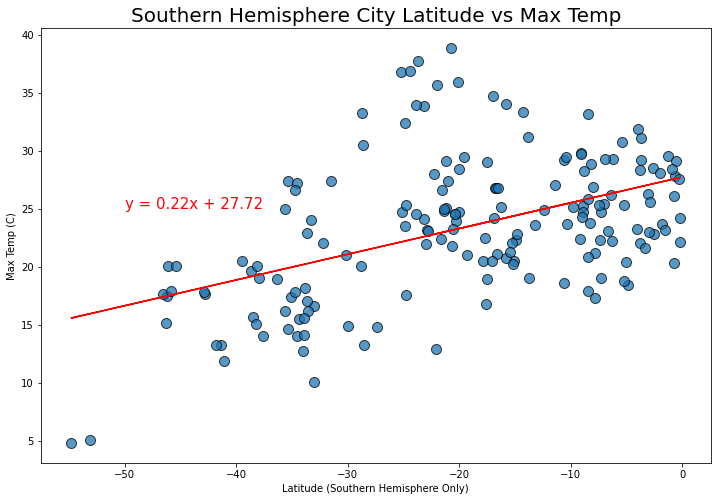

In [36]:
line_equation = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

southern_x_values = southern_hemi_df['Lat']
southern_y_values = southern_hemi_df['Max Temp']

#Make scatter plot
plt.scatter(southern_x_values,southern_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Southern Hemisphere Only)')
plt.ylabel('Max Temp (C)')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Southern Hemisphere City Latitude vs Max Temp", fontsize =20)

#add regression
plt.annotate(line_equation,(-50,25),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship between latitude and max temp:** 

Findings: 
1. Looking at both graphs, the max temperature of a city increases as latitude approaches 0. In other words, as one moves closer to the equator, the temperature increases. 
2. The northern hempisphere's rate of temperature increase is greater than the rate in the southern hemisphere. We can reasonably expect a greater difference in temperature between the northernmost and southernmost cities in the northern hemipshere than in the southern hemisphere. 
3. If looking at temperature alone, we can expect worse outcomes for cities in the northern hemisphere due to climate change than in the southern. However, this assumption may be incorrect as we are not taking additional data into account, such as weather patterns, population statistics, disease rates, etc.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.27425523383368783


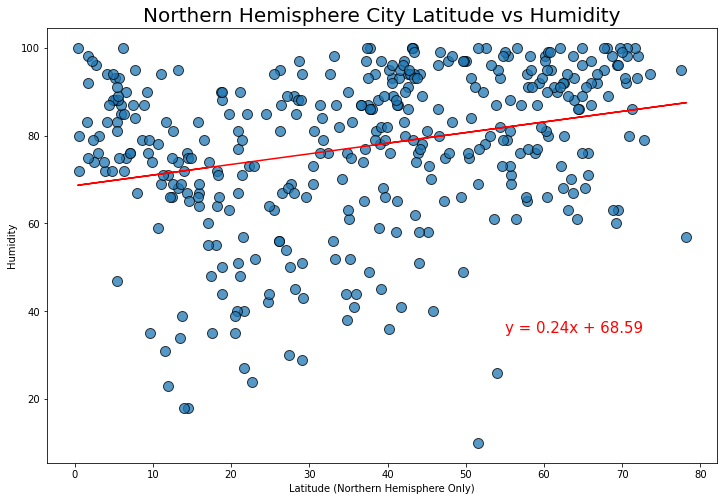

In [37]:
# Northern Hemisphere City Lat vs Humidity
line_equation = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

northern_x_values = northern_hemi_df['Lat']
hum_north_y_values = northern_hemi_df['Humidity']

#Make scatter plot
plt.scatter(northern_x_values,hum_north_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Northern Hemisphere Only)')
plt.ylabel('Humidity')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Northern Hemisphere City Latitude vs Humidity", fontsize =20)

#add regression
plt.annotate(line_equation,(55,35),fontsize=15,color="red")

plt.show()

The r-value is: 0.378886958587077


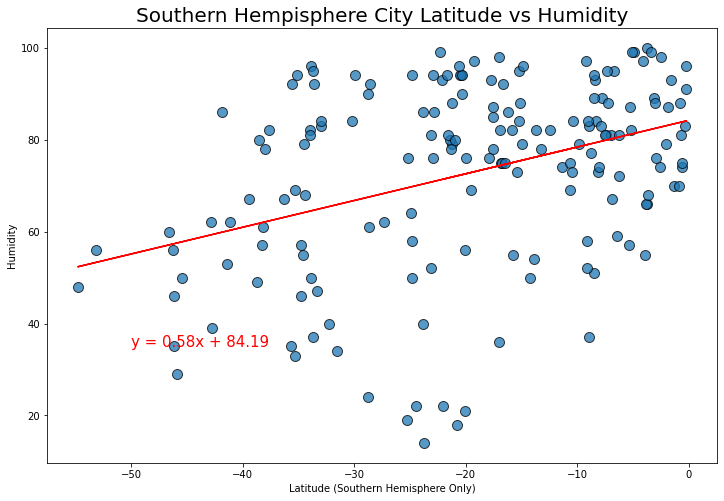

In [38]:
# Southern Hemisphere City Lat vs Humidity
line_equation = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

southern_x_values = southern_hemi_df['Lat']
hum_south_y_values = southern_hemi_df['Humidity']

#Make scatter plot
plt.scatter(southern_x_values,hum_south_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Southern Hemisphere Only)')
plt.ylabel('Humidity')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Southern Hempisphere City Latitude vs Humidity", fontsize =20)

#add regression
plt.annotate(line_equation,(-50,35),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship between latitude and humidity:**

Findings: 
1. Humidity increases in the northern hemisphere as you move away from the equator. However, there's not a lot of variability in humidity based on latitude. 
2. Opposite to the northern hempisphere, humidity increases as you move towards the equator in the southern hemisphere. There is greater variability in humidity levels in the southern hemisphere compared to the northern hemisphere.
3. Because the most humid locations are centered around the southern hemisphere close to the equator and across the northern hemisphere, differences in humidity from place to place is most likely caused by some factor(s) other than latitude alone. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2563896137433931


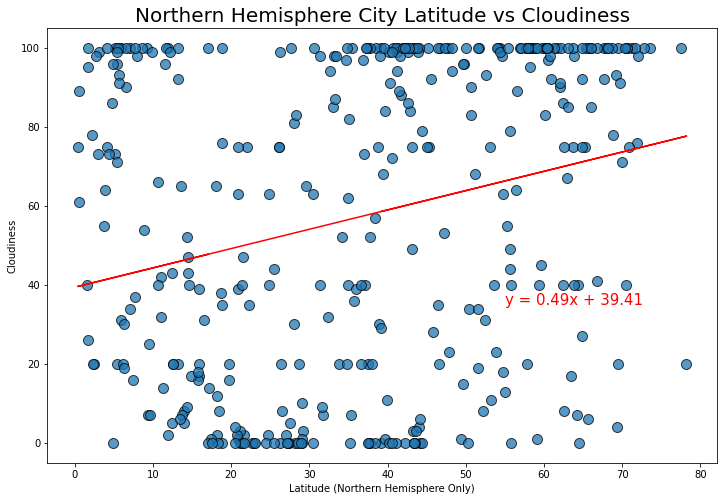

In [39]:
# Northern Hemisphere City Lat vs Cloudiness
line_equation = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

northern_x_values = northern_hemi_df['Lat']
cloud_north_y_values = northern_hemi_df['Cloudiness']

#Make scatter plot
plt.scatter(northern_x_values,cloud_north_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Northern Hemisphere Only)')
plt.ylabel('Cloudiness')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Northern Hemisphere City Latitude vs Cloudiness", fontsize =20)

#add regression
plt.annotate(line_equation,(55,35),fontsize=15,color="red")

plt.show()

The r-value is: 0.3053991215513646


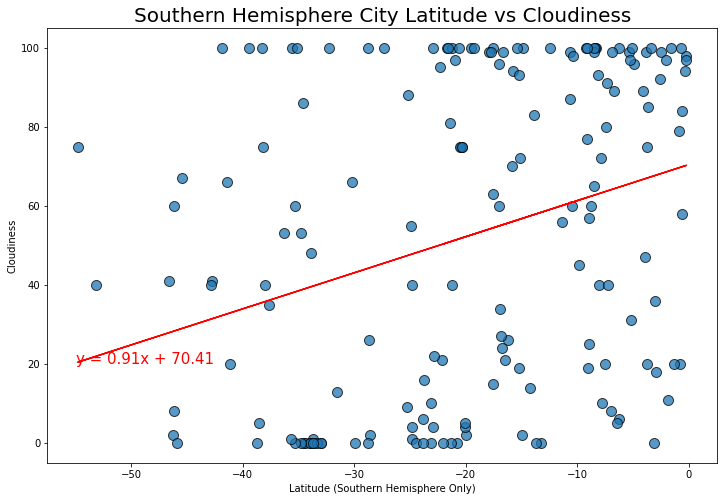

In [40]:
# Southern Hemisphere City Lat vs Cloudiness
line_equation = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

southern_x_values = southern_hemi_df['Lat']
cloud_south_y_values = southern_hemi_df['Cloudiness']

#Make scatter plot
plt.scatter(southern_x_values,cloud_south_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Southern Hemisphere Only)')
plt.ylabel('Cloudiness')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Southern Hemisphere City Latitude vs Cloudiness", fontsize =20)

#add regression
plt.annotate(line_equation,(-55,20),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship between latitude and cloudiness:** 

Findings: 
1. Cloud coverage increases as one moves towards the north pole. 
2. Because cities in the northern hemisphere are closer to the north pole, they are cloudier than cities in the southern hemisphere. 
3. There is greater variability in cloudiness between the southernmost and northernmost locations in the southern hemisphere than in the northern hemisphere. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14600822584309528


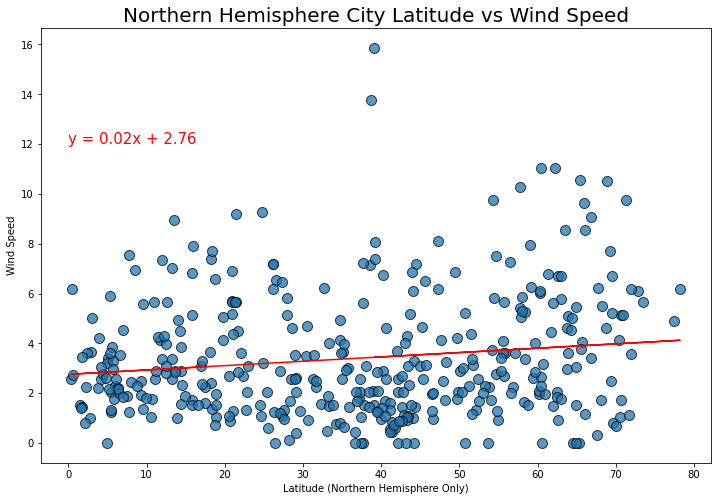

In [41]:
# Northern Hemisphere City Lat vs Wind Speed
line_equation = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

northern_x_values = northern_hemi_df['Lat']
wind_north_y_values = northern_hemi_df['Wind Speed']

#Make scatter plot
plt.scatter(northern_x_values,wind_north_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Northern Hemisphere Only)')
plt.ylabel('Wind Speed')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Northern Hemisphere City Latitude vs Wind Speed", fontsize =20)

#add regression
plt.annotate(line_equation,(0,12),fontsize=15,color="red")

plt.show()

The r-value is: -0.3741831785105611


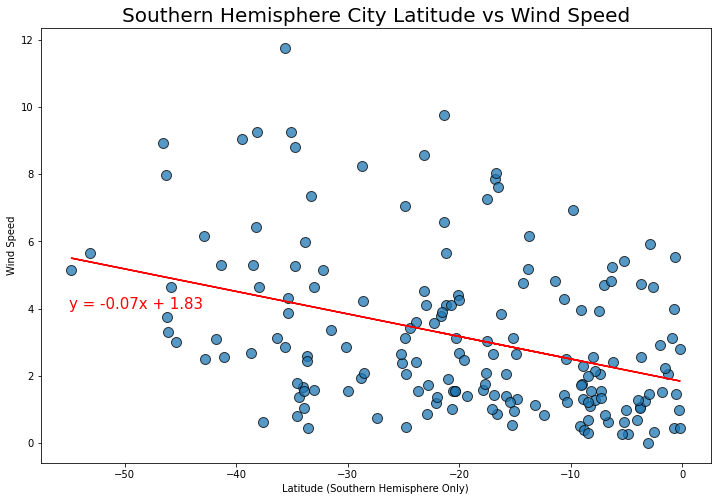

In [42]:
# Southern Hemisphere City Lat vs Cloudiness
line_equation = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

southern_x_values = southern_hemi_df['Lat']
wind_south_y_values = southern_hemi_df['Wind Speed']

#Make scatter plot
plt.scatter(southern_x_values,wind_south_y_values, edgecolors = 'black', s=100, alpha = .75)
plt.xlabel('Latitude (Southern Hemisphere Only)')
plt.ylabel('Wind Speed')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("Southern Hemisphere City Latitude vs Wind Speed", fontsize =20)

#add regression
plt.annotate(line_equation,(-55,4),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship between latitude and windspeed:**
1. Wind speed decreases as you move towards the equator. This is true for both the northern and southern hemipsheres. 
2. The southern hemispehre has higher windspeeds than the northern hemisphere. 
3. While the data show that 1 and 2 above are true, there's not a large difference in windspeed in each hemisphere between those cities closer to the equator and those that are farther away. In general, anywhere on earth you can expect a wind speed between 2 and 6. 